<a href="https://colab.research.google.com/github/vaneesa-writes/micro_project/blob/main/the_jugad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [278]:
import os,matplotlib.pyplot as plt,cv2

In [279]:
import cv2
import numpy as np

img_grey = cv2.imread('/content/mask3.png', 0)

#convert img to grey
# img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#set a thresh
thresh = 100
#get threshold image
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
#find contours
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# print((contours))

cx=0
cy=0

for cont in contours[0]:
  cx+=cont[0][0]
  cy+=cont[0][1]
cx=int(cx/len(contours[0]))
cy=int(cy/len(contours[0]))

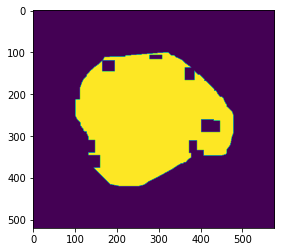

In [280]:
mx,my=img_grey.shape[0],img_grey.shape[1]

import random
new_img = img_grey.copy()
  

for i in range(len(contours[0])):
  if(i%20==0):
    dir = random.randint(0,1)
    cor = random.randint(0,1)
    col = 0
    dis = random.randint(0,50)
    x=contours[0][i][0][0]
    y=contours[0][i][0][1]

    j=0

    while(j<30):
      if(cor==0):
        dy=y
        d=dis
        while(d!=0):
          d-=1
          try:
            new_img[x][dy]=col
          except:
            pass
          if(dir):
            dy+=1
          else:
            dy-=1
        x+=1
      else:
        dx=x
        d=dis
        while(d!=0):
          d-=1
          try:
            new_img[dx][y]=col
          except:
            pass
          if(dir):
            dx+=1
          else:
            dx-=1
        y+=1
      j+=1

plt.imshow(new_img)

In [281]:
from scipy import ndimage
new_img = ndimage.binary_fill_holes(new_img).astype(int)

from PIL import Image, ImageFilter
im = Image.fromarray((new_img * 255).astype(np.uint8))

In [282]:

image = im.filter(ImageFilter.ModeFilter(size=13))
image.save('output_mask3.png')

In [283]:
img.shape

(520, 577)